# Customer Churn With Statistical Analysis

## Introduction
Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers. Companies that can reduce customer churn will be more profitable and have a better reputation. In this notebook, we will analyze a dataset of a telecommunications company to understand the factors that lead to customer churn. We will use statistical analysis to identify the most important factors that influence customer churn.

## Dataset
The dataset contains information about customers of a telecommunications company. We collected this dataset from [kaggle](https://www.kaggle.com/datasets/aadityabansalcodes/telecommunications-industry-customer-churn-dataset/). The dataset has the following columns:

- LoyaltyID: A unique identifier for the customer
- Customer ID: A unique identifier for the customer
- Senior Citizen: Whether the customer is a senior citizen (1) or not (0)
- Partner: Whether the customer has a partner (Yes) or not (No)
- Dependents: Whether the customer has dependents (Yes) or not (No)
- Tenure: The number of months the customer has been with the company
- Phone Service: Whether the customer has phone service (Yes) or not (No)
- Multiple Lines: Whether the customer has multiple lines (Yes) or not (No)
- Internet Service: The type of internet service the customer has (DSL, Fiber optic, No)
- Online Security: Whether the customer has online security (Yes) or not (No)
- Online Backup: Whether the customer has online backup (Yes) or not (No)
- Device Protection: Whether the customer has device protection (Yes) or not (No)
- Tech Support: Whether the customer has tech support (Yes) or not (No)
- Streaming TV: Whether the customer has streaming TV (Yes) or not (No)
- Streaming Movies: Whether the customer has streaming movies (Yes) or not (No)
- Contract: The type of contract the customer has (Month-to-month, One year, Two year)
- Paperless Billing: Whether the customer has paperless billing (Yes) or not (No)
- Payment Method: The payment method the customer uses (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- Monthly Charges: The amount the customer pays each month
- Total Charges: The total amount the customer has paid
- Churn: Whether the customer has churned (Yes) or not (No)

## Objective
The objective of this notebook is to analyze the dataset to understand the factors that lead to customer churn. We will use statistical analysis to identify the most important factors that influence customer churn. We will perform the following steps:
1. [Load the dataset](##Load-the-dataset)
2. [Explore the dataset](##exploratory-data-analysis)
3. [Preprocess the dataset](##Data-preprocessing)
4. [Perform statistical analysis](##statistical-analysis)
5. Interpret the results


## Load the dataset

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [102]:
# Load the data
df = pd.read_csv('.\dataset\CustomerChurn.csv')
df_copy = df.copy()
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [103]:
df['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

## Exploratory Data Analysis

In [104]:
# check the shape of the data
df.columns

Index(['LoyaltyID', 'Customer ID', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [105]:
# check the shape of the data
df.shape

(7043, 21)

In [106]:
# check for missing values
df.isnull().sum().max()

0

In [107]:
# check for duplicates
df.duplicated().sum()

0

In [108]:
# check the data types
df.dtypes

LoyaltyID              int64
Customer ID           object
Senior Citizen        object
Partner               object
Dependents            object
Tenure                 int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn                 object
dtype: object

In [109]:
# check the unique values in each column
df.nunique()

LoyaltyID            7021
Customer ID          7043
Senior Citizen          2
Partner                 2
Dependents              2
Tenure                 73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn                   2
dtype: int64

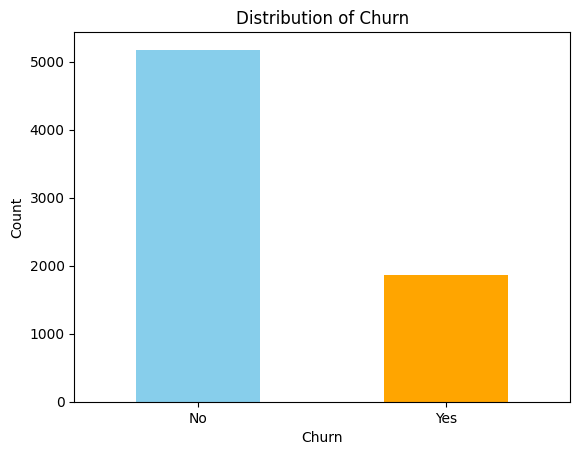

In [110]:
# check the distribution of the target variable
churn_count = df['Churn'].value_counts()

churn_count.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Data Preprocessing

In [111]:
# find Q1 and Q3 and find outliers in monthly charges
Q1 = df['Monthly Charges'].quantile(0.25)
Q3 = df['Monthly Charges'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Monthly Charges'] < (Q1 - 1.5 * IQR)) | (df['Monthly Charges'] > (Q3 + 1.5 * IQR))]
outliers.shape[0]

0

In [112]:
# find Q1 and Q3 and find outliers in total charges
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].isnull().sum()

11

In [113]:
# filter df for missing values in Total Charges
df_total_na = df[df['Total Charges'].isnull()]
df_total_na

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,344543,4472-LVYGI,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,150036,3115-CZMZD,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,497688,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,158969,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,470044,1371-DWPAZ,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,937662,7644-OMVMY,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,821083,3213-VVOLG,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,947028,2520-SGTTA,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,135257,2923-ARZLG,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,317862,4075-WKNIU,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [114]:
# get index of missing values in Total Charges then see it in the original data
df_total_na_index = df_total_na.index
df_copy.loc[df_total_na_index]

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,344543,4472-LVYGI,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,150036,3115-CZMZD,No,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,497688,5709-LVOEQ,No,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,158969,4367-NUYAO,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,470044,1371-DWPAZ,No,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,937662,7644-OMVMY,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,821083,3213-VVOLG,No,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,947028,2520-SGTTA,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,135257,2923-ARZLG,No,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,317862,4075-WKNIU,No,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


## Statistical Analysis

In [115]:
# categorical columns
columns_plot = df.columns.drop(['Customer ID', 'Churn', 'Total Charges', 'Monthly Charges', 'Tenure', 'LoyaltyID'])
# numerical columns
columns_numerical_plot = ['Monthly Charges', 'Tenure']

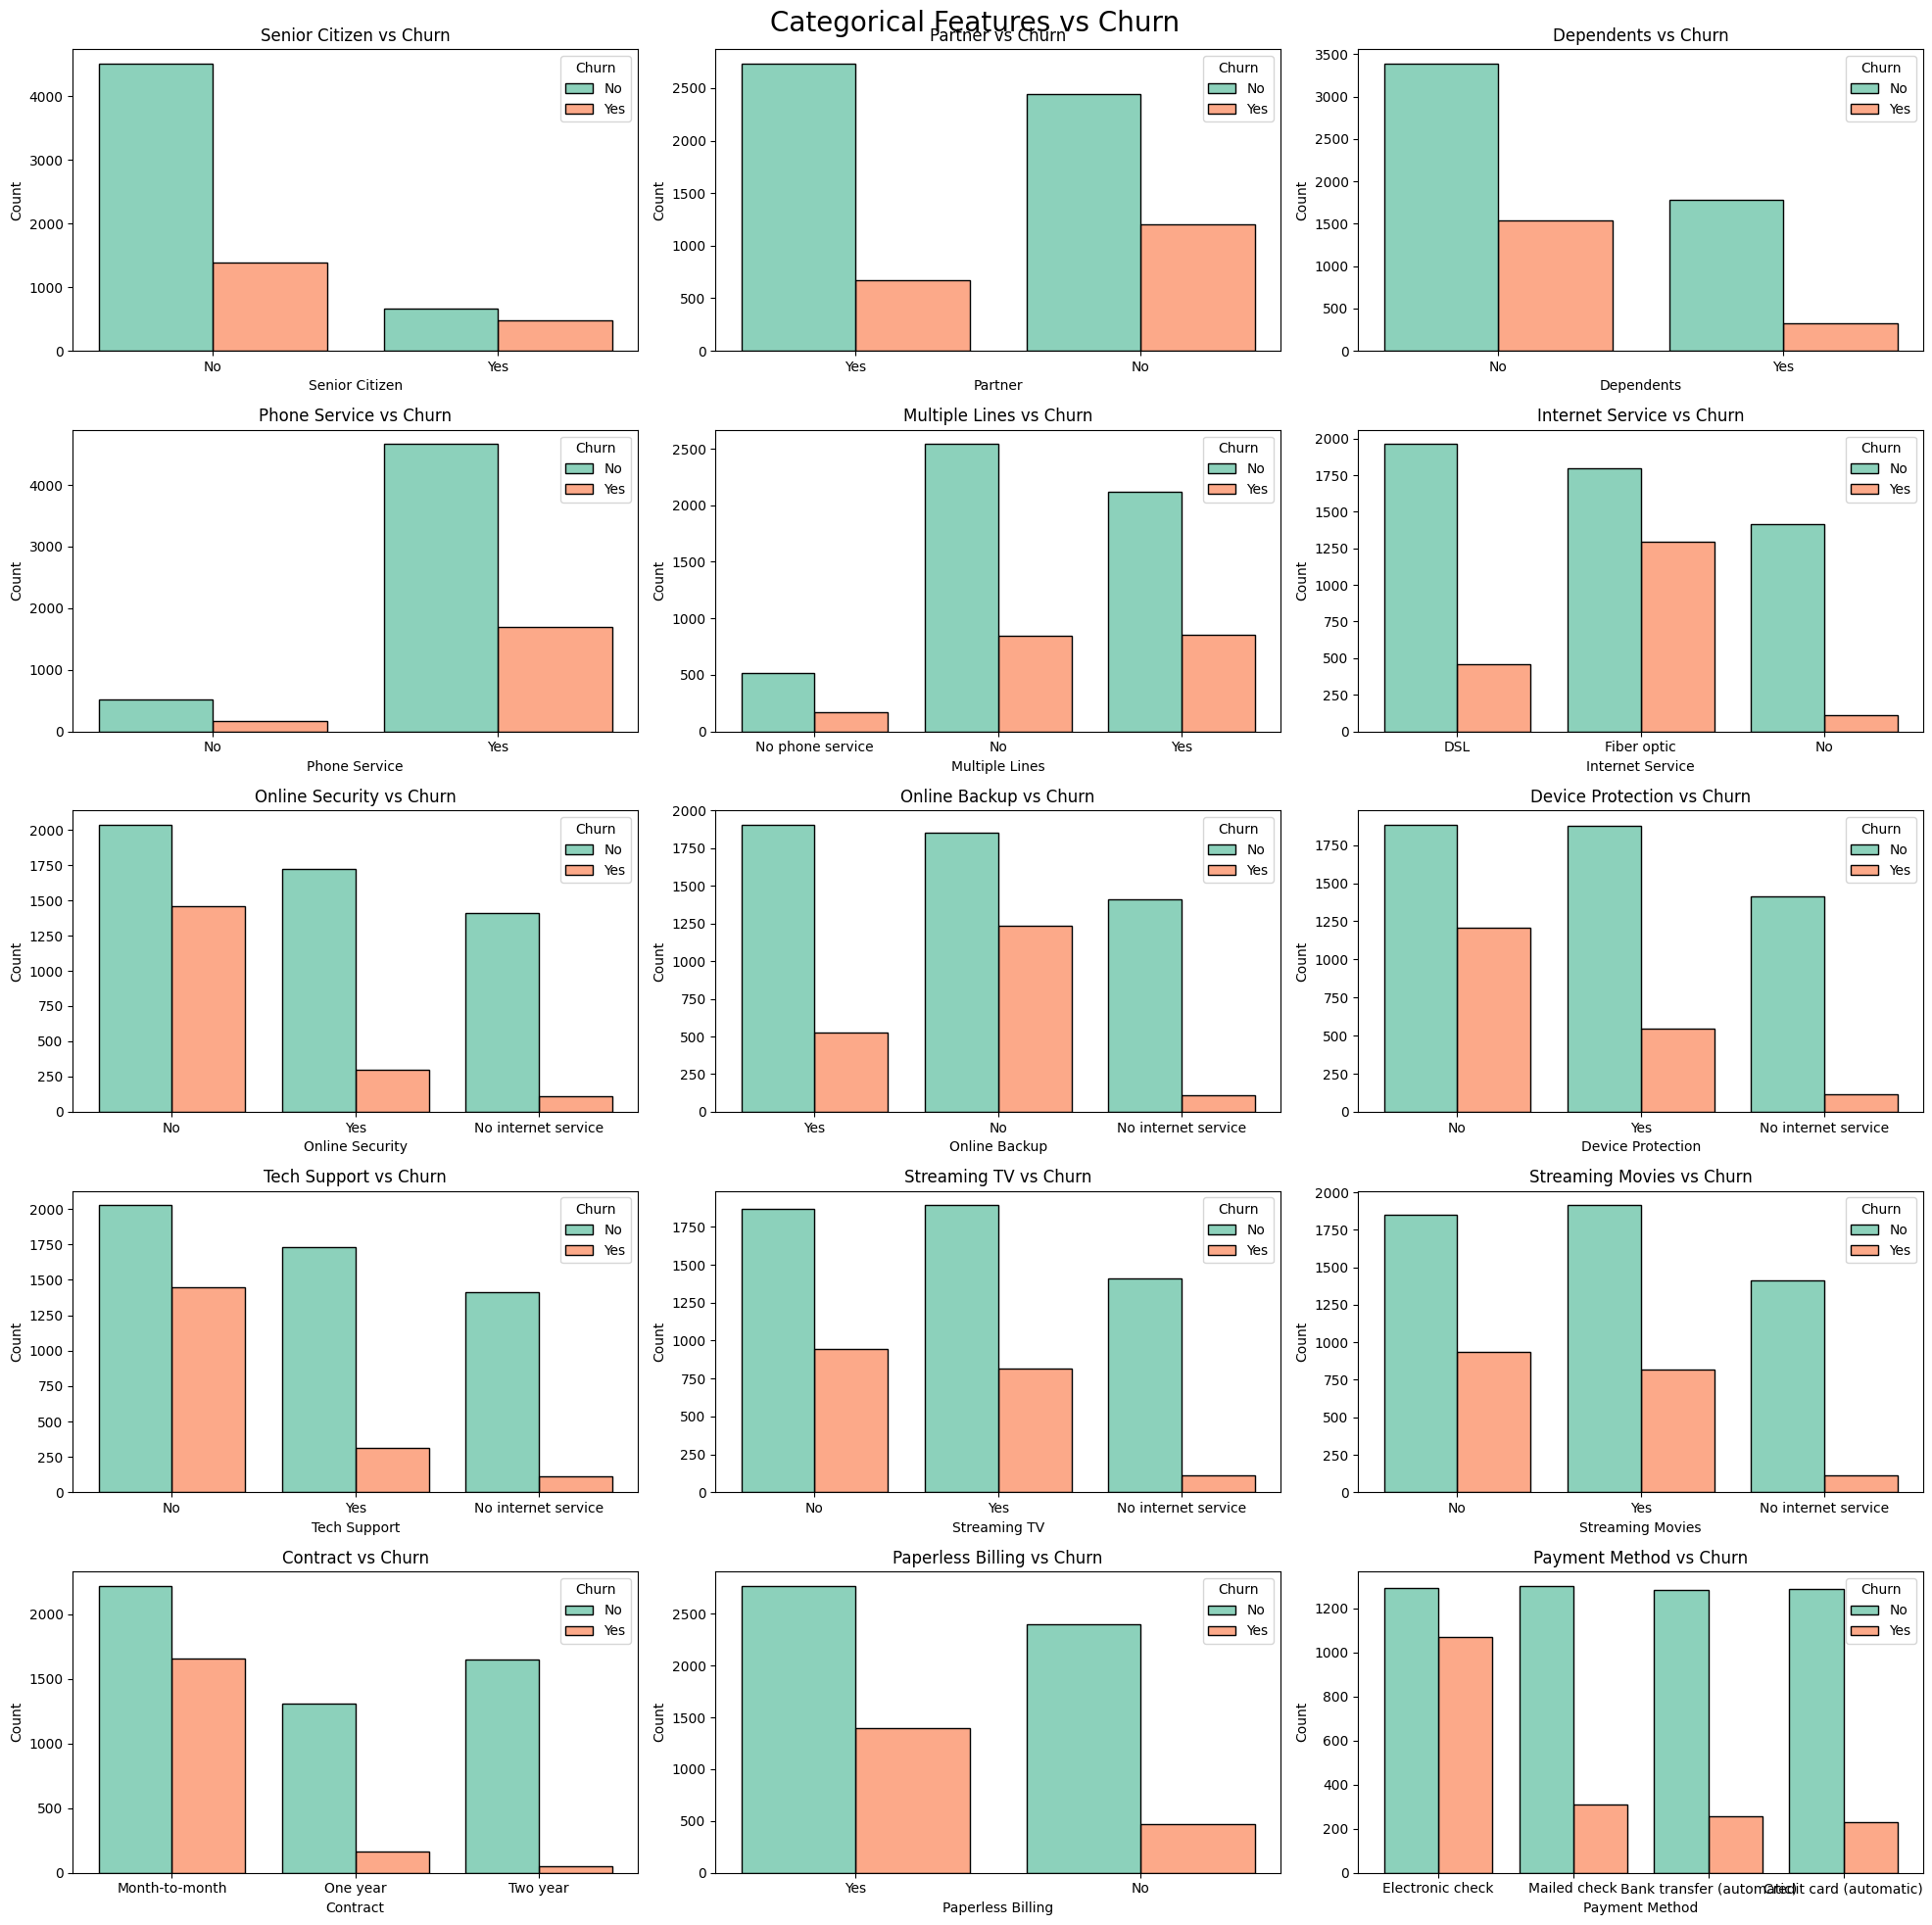

In [116]:
# the original data has 21 features after selection there are 17 features excluding the target variable
# plot the categorical columns compared to the target variable
fig, ax = plt.subplots(5, 3, figsize=(20, 20))
fig.suptitle('Categorical Features vs Churn', fontsize=20)
for i, column in enumerate(columns_plot):
    sns.histplot(x=column, data=df, ax=ax[i // 3, i % 3], palette='Set2', hue='Churn', multiple='dodge', shrink=0.8)
    ax[i // 3, i % 3].set_title(f'{column} vs Churn')
    ax[i // 3, i % 3].set_xlabel(column)
    ax[i // 3, i % 3].set_ylabel('Count')

plt.tight_layout()
plt.show()

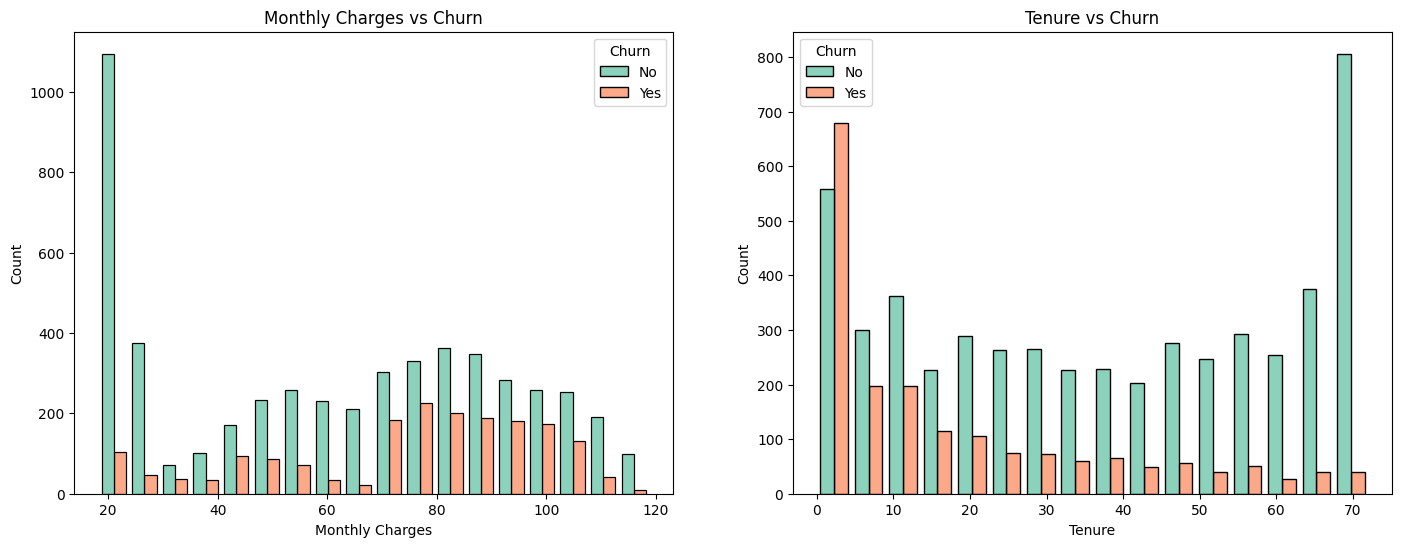

In [117]:
# plot the numerical columns compared to the target variable
fig, ax = plt.subplots(1, 2, figsize=(17, 6))
for i, column in enumerate(columns_numerical_plot):
    sns.histplot(x=column, data=df, ax=ax[i], palette='Set2', hue='Churn', multiple='dodge', shrink=0.8)
    ax[i].set_title(f'{column} vs Churn')
    ax[i].set_xlabel(column)
    ax[i].set_ylabel('Count')

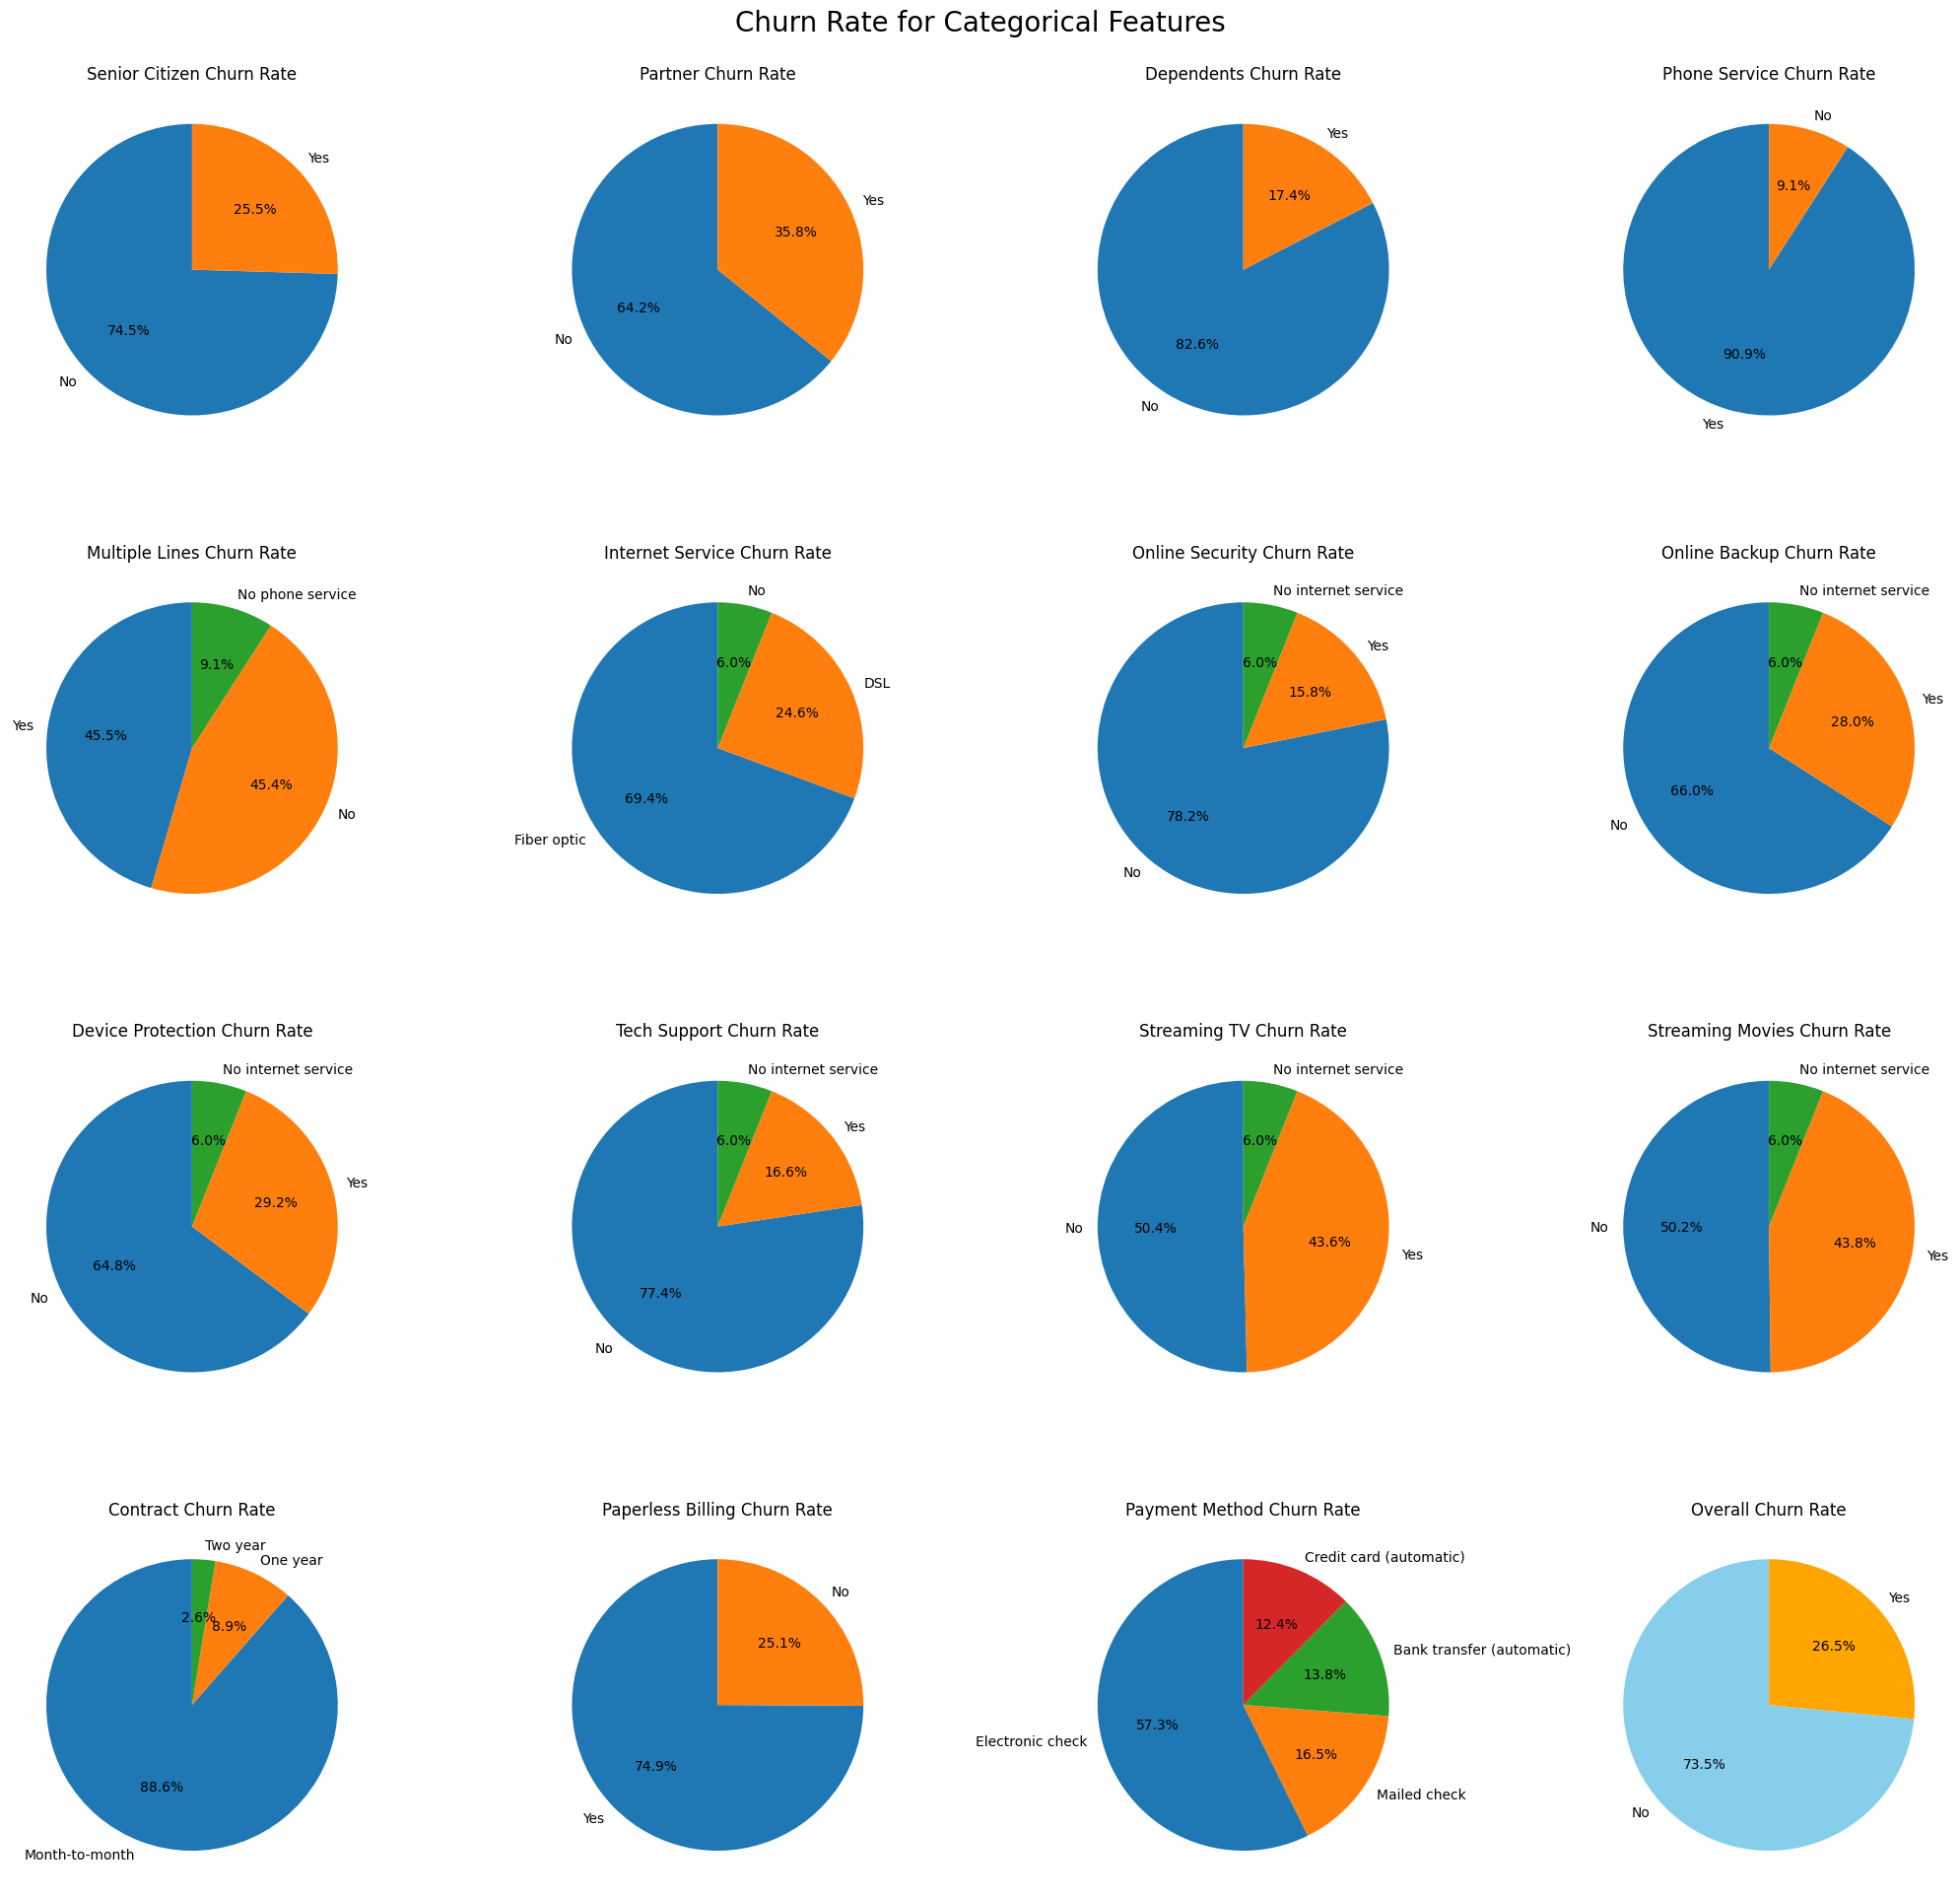

In [118]:
# find churn rate for each column in the categorical columns and overall churn and plot it
fig, ax = plt.subplots(4, 4, figsize=(20, 20))
fig.suptitle('Churn Rate for Categorical Features', fontsize=20)
# use pie chart to show the churn rate for each column
df_churn = df[df['Churn'] == 'Yes']
for i, column in enumerate(columns_plot):
    churn_rate = df_churn[column].value_counts(normalize=True)
    churn_rate.plot(kind='pie', ax=ax[i // 4, i % 4], autopct='%1.1f%%', startangle=90)
    ax[i // 4, i % 4].set_title(f'{column} Churn Rate')
    ax[i // 4, i % 4].set_ylabel('')
# overall churn rate
churn_rate = df['Churn'].value_counts(normalize=True)
churn_rate.plot(kind='pie', ax=ax[3, 3], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'])
ax[3, 3].set_title('Overall Churn Rate')
ax[3, 3].set_ylabel('')

plt.tight_layout()
plt.show()

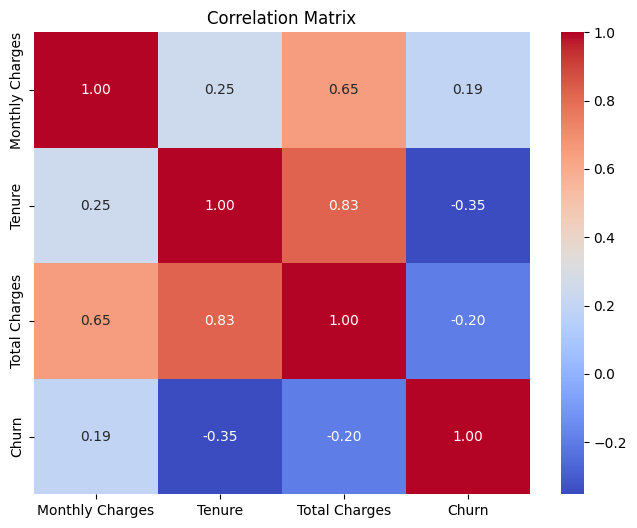

In [119]:
# find the correlation between the numerical columns
df_numerical = df[['Monthly Charges', 'Tenure', 'Total Charges', 'Churn']]

# replace the missing values in Total Charges with the median
df_numerical['Total Charges'] = df_numerical['Total Charges'].fillna(df_numerical['Total Charges'].median())

# convert the target variable to numerical
df_numerical['Churn'] = df_numerical['Churn'].map({'Yes': 1, 'No': 0})

# find the correlation matrix
correlation_matrix = df_numerical.corr()

# plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Hypothesis testing with monthly payments

Comparing the means of two groups to determine if they are significantly different is a common statistical analysis technique.
- Null Hypothesis: The means of the two groups are equal.
- Alternative Hypothesis: The means of the two groups are not equal.

we will use z-test to compare the means of two groups. The z-test is used when the sample size is large and the population standard deviation is known.

**Formula**
$$
z = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

#### 2 Tailed test

In [128]:
# find x1 bar and x2 bar use groupby
df_group = df_numerical.groupby('Churn')
df_mean = df_group['Monthly Charges'].mean()

# find s1 and s2 of sample
df_std = df_group['Monthly Charges'].std()

# find n1 and n2 of sample
df_count = df_group['Monthly Charges'].count()

Churn
0    61.265124
1    74.441332
Name: Monthly Charges, dtype: float64

In [126]:
# use z-test to find the p-value
from scipy.stats import norm

x1_bar = df_mean[0]
x2_bar = df_mean[1]

s1 = df_std[0]
s2 = df_std[1]

n1 = df_count[0]
n2 = df_count[1]

z = (x1_bar - x2_bar) / np.sqrt((s1 ** 2 / n1) + (s2 ** 2 / n2))
p_value = 2 * (1 - norm.cdf(abs(z)))

print(f'Z-score: {z}')
print(f'P-value: {p_value}')

Z-score: -18.407526676414673
P-value: 0.0


#### Left Tail Test

- h0: x1_bar >= x2_bar
- h1: x1_bar < x2_bar

In [129]:


p_value = norm.cdf(z)

print(f'Z-score: {z}')
print(f'P-value: {p_value}')

Z-score: -18.407526676414673
P-value: 5.716289560505238e-76


### Interpreting the testing results

- For a two-tailed test, z-score is -18.41 and p-value is 0.0. Since the p-value is less than 0.05, we reject the null hypothesis that the means of the two groups are equal. This means that the difference in the means of the two groups is statistically significant.
- For a left-tailed test, z-score is -18.41 and p-value is 5.72e-76. Since the p-value is less than 0.05, we reject the null hypothesis that the means of the two groups are equal. This means that the difference in the means of the two groups is statistically significant and the mean of the not-churn group is less than the mean of the churn group.

# Hypothesis testing with tenure

Comparing the means number of of two groups to determine if they are significantly different is a common statistical analysis technique.
- Null Hypothesis: $\mu_{not churn} \leq \mu_{churn}$
- Alternative Hypothesis: $\mu_{not churn} > \mu_{churn}$

In [133]:
# find mean of tenure for each group
df_mean_tenure = df_group['Tenure'].mean()

# find standard deviation of tenure for each group
df_std_tenure = df_group['Tenure'].std()

# find count of tenure for each group
df_count_tenure = df_group['Tenure'].count()

In [136]:
x1_bar = df_mean_tenure[0]
x2_bar = df_mean_tenure[1]

s1 = df_std_tenure[0]
s2 = df_std_tenure[1]

n1 = df_count_tenure[0]
n2 = df_count_tenure[1]

z = (x1_bar - x2_bar) / np.sqrt((s1 ** 2 / n1) + (s2 ** 2 / n2))
# right-tailed test
p_value = 1 - norm.cdf(z)

print(f'Z-score: {z}')
print(f'P-value: {p_value}')

Z-score: 34.82381869631297
P-value: 0.0


### Interpreting the testing results

Z-score is 34.82 and p-value is 0.0. Since the p-value is less than 0.05, we reject the null hypothesis that the means of the two groups are equal. This means that the difference in the means of the two groups is statistically significant and the mean numebr of tenure of the not-churn group is greater than the mean number of tenure of the churn group.

### Test all categorical variables

In [139]:
# use chi-square test to find the p-value of the categorical columns
from scipy.stats import chi2_contingency

# create a function to find the p-value of the chi-square test
def chi_square_test(df, column):
    cross_table = pd.crosstab(df[column], df['Churn'])
    chi2, p_value, dof, expected = chi2_contingency(cross_table)
    return p_value

# find the p-value of the chi-square test for each column
p_values = {}
for column in columns_plot:
    p_value = chi_square_test(df, column)
    p_values[column] = p_value

# put them in a dataframe
p_values = pd.DataFrame(p_values.items(), columns=['Feature', 'P-value'])
p_values['Significance'] = p_values['P-value'].apply(lambda x: 'Significant' if x < 0.05 else 'Not Significant')

# sort the p-values
p_values = p_values.sort_values(by='P-value')

p_values

,Feature,P-value,Significance
12,Contract,5.863038e-258,Significant
6,Online Security,2.661150e-185,Significant
9,Tech Support,1.443084e-180,Significant
5,Internet Service,9.571788e-160,Significant
14,Payment Method,3.682355e-140,Significant
7,Online Backup,2.079759e-131,Significant
8,Device Protection,5.505219e-122,Significant
11,Streaming Movies,2.667757e-82,Significant
10,Streaming TV,5.528994e-82,Significant
13,Paperless Billing,4.073355e-58,Significant


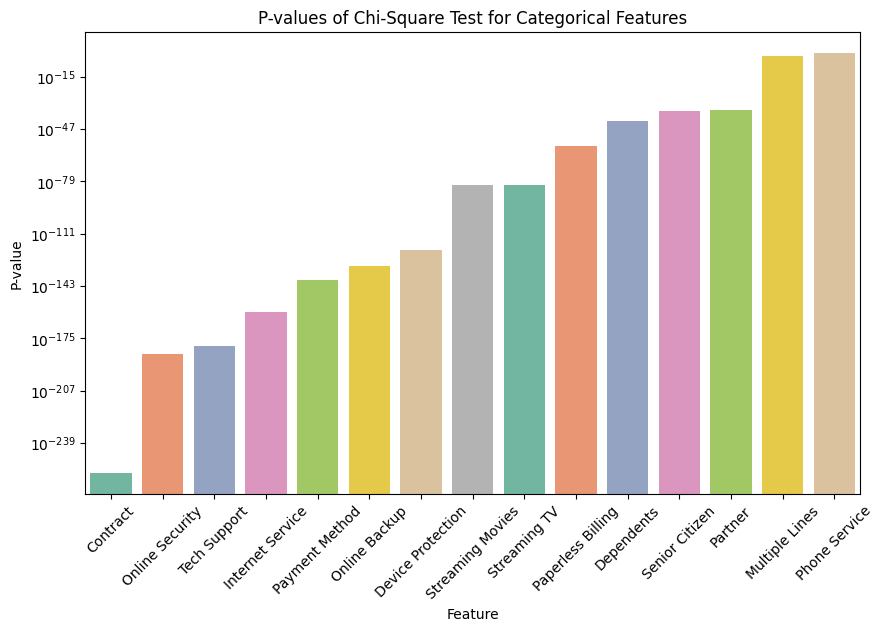

In [140]:
# plot the p-values
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='P-value', data=p_values, palette='Set2')
plt.title('P-values of Chi-Square Test for Categorical Features')
plt.xticks(rotation=45)
plt.yscale('log')
plt.show()